<a href="https://colab.research.google.com/github/wolfos20/Oib-Sip-Internship/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')



In [316]:
df= pd.read_csv("/content/drive/MyDrive/oib sip files/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [317]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [318]:
df = df.drop(columns = ['Id'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [320]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

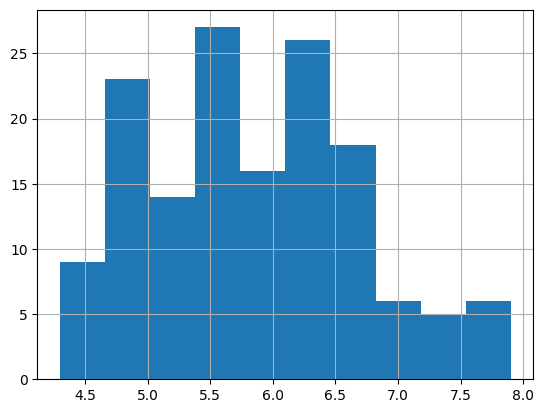

In [321]:
df['SepalLengthCm'].hist()


<Axes: >

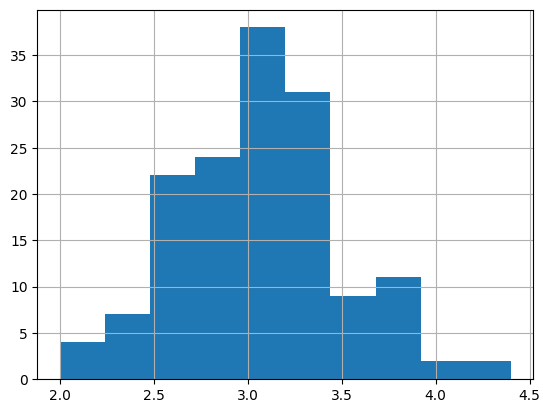

In [322]:
df['SepalWidthCm'].hist()


<Axes: >

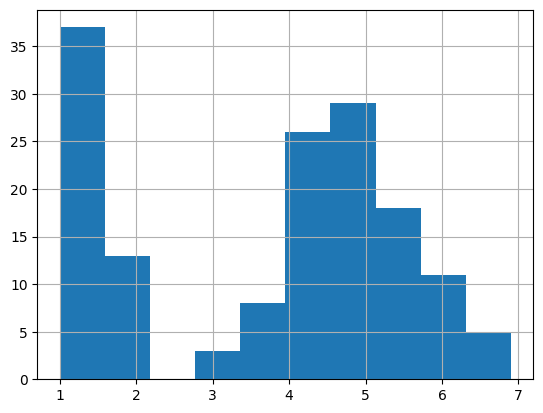

In [323]:
df['PetalLengthCm'].hist()

<Axes: >

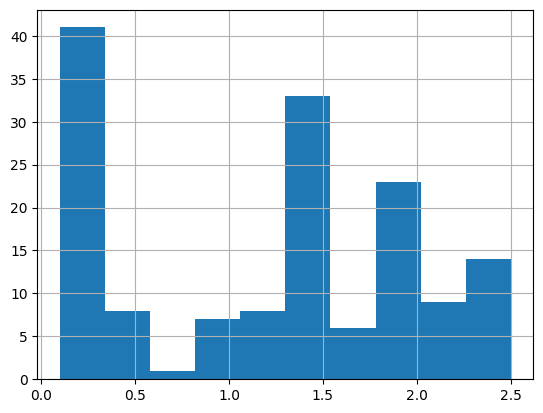

In [324]:
df['PetalWidthCm'].hist()

In [325]:
df.dtypes


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [326]:
encoded_data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
corr_matrix = encoded_data.corr()

<Axes: >

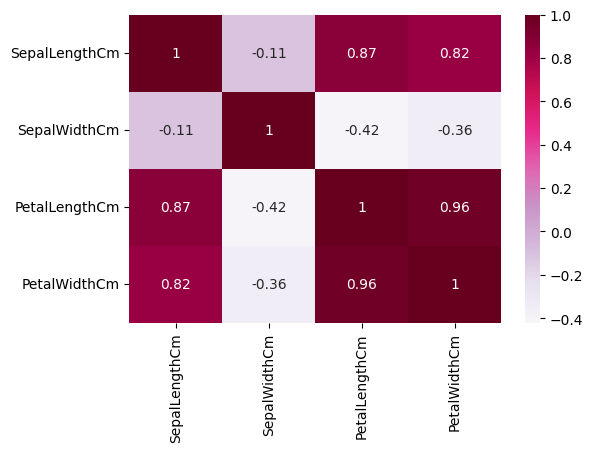

In [327]:
fig, ax =plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd')

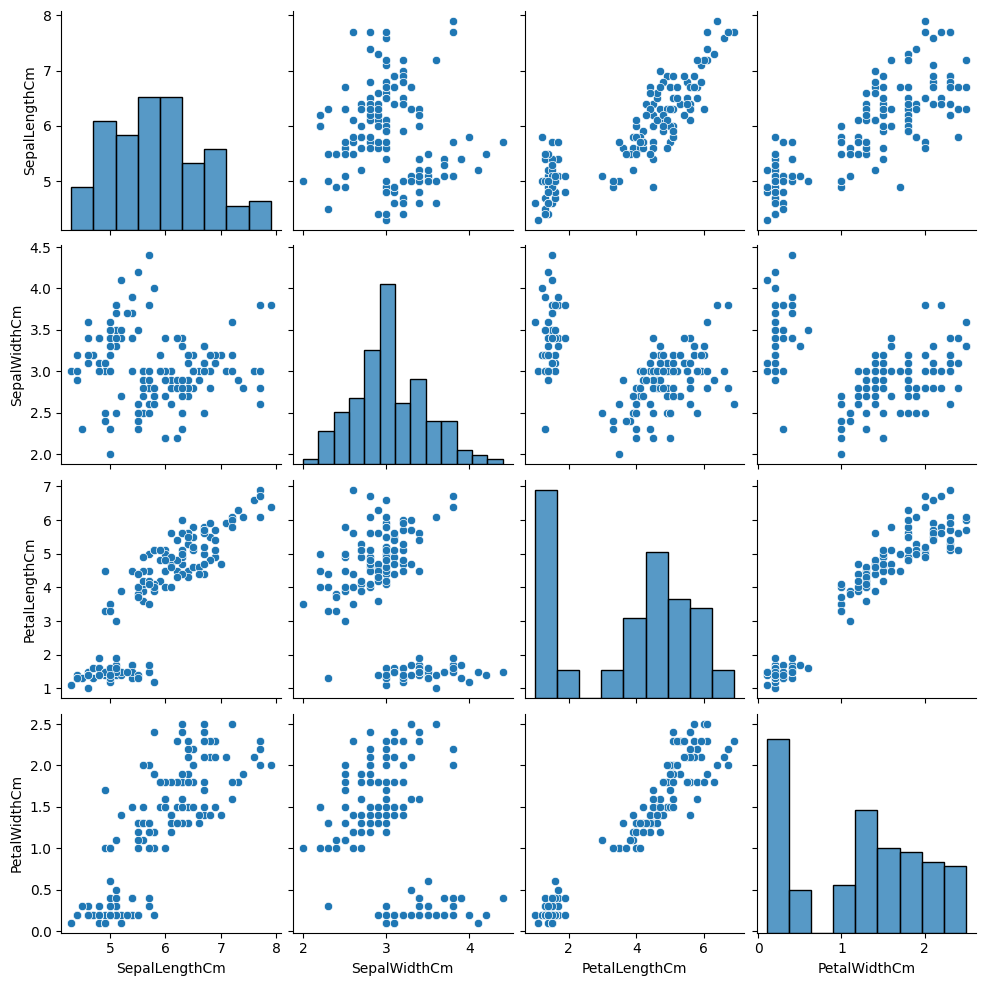

In [328]:
sns.pairplot(df)

In [329]:
from sklearn.preprocessing import LabelEncoder

In [330]:
encoder = LabelEncoder()

In [331]:
df.Species=encoder.fit_transform(df.Species)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [332]:
from sklearn.model_selection import train_test_split
# training data = 80
#testing data = 20
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)


In [333]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
133,6.3,2.8,5.1,1.5
102,7.1,3.0,5.9,2.1
2,4.7,3.2,1.3,0.2
92,5.8,2.6,4.0,1.2
72,6.3,2.5,4.9,1.5
...,...,...,...,...
66,5.6,3.0,4.5,1.5
18,5.7,3.8,1.7,0.3
143,6.8,3.2,5.9,2.3
89,5.5,2.5,4.0,1.3


In [334]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
model.fit(x_train , y_train)

In [336]:
print('Accuracy:',model.score(x_test,y_test))

Accuracy: 1.0


In [337]:
def predict_class(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]


In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [339]:
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

Enter sepal length: 4.7
Enter sepal width: 3.2
Enter petal length: 1.3
Enter petal width: 0.2


In [340]:
predicted_class = predict_class(sepal_length, sepal_width, petal_length, petal_width	)
print("Predicted class for  values: ", predicted_class)

Predicted class for  values:  0
